# Day 2 - Data Science Essentials Program

**Agenda**

- wrapping up Pandas (Groupby)
- Visualizations
    - Pandas
    - Matplotlib
    - Seaborn
    - Plotly
- Linear regressions

**Before we get started**
- finish installing the rest of the packages; you can find them all typed out in the `Packages to Install.ipynb` file

## Import Packages and Data

In [1]:
import pandas as pd
finData = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name=1)
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], index_col=['Date'])
aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'], index_col=['Date'])

## Grouping Data
- `table.groupby(categories to summarize)[[headers to calc]].function()`
- `table.groupby(how)[what]`
- you can have more than one function with `.agg(list of functions)`
- you can be more specific and map out each col with a function by using a dictionary:
    - `.agg({'colName':'function', 'colName':'function'})`

In [11]:
#aapl['Year'] = aapl['Date'].dt.year
aapl['Year'] = aapl.index.year
aapl['Quarter'] = aapl.index.quarter

**Pivots with mapped agg**
- create the dictionary with all the rules
- then do the groupby

In [19]:
rules = {'Open':'first', 'Close':'last','High':'max', 'Low':'min','Volume':'max'}

In [20]:
aapl.groupby(['Year','Quarter']).agg(rules)

Open       Close        High         Low     Volume
Year Quarter                                                           
2013 4         68.349998   80.145714   82.162857   68.325714  158951800
2014 1         79.382858   76.677139   80.028572   70.507141  266380800
     2         76.822861   92.930000   95.050003   73.047142  189977900
     3         93.519997  100.750000  103.739998   92.570000  189846300
     4        100.589996  110.379997  119.750000   95.180000  100933600
2015 1        111.389999  124.430000  133.600006  104.629997  146477100
     2        124.820000  125.430000  134.539993  123.099998  118924000
     3        126.900002  110.300003  132.970001   92.000000  162206300
     4        109.070000  105.260002  123.820000  104.820000   96453300
2016 1        102.610001  108.989998  110.419998   92.389999  133369700
     2        108.779999   95.599998  112.389999   89.470001  114602100
     3         95.489998  113.050003  116.180000   94.370003  110888700
     4        112.709999  115.820000  118.690002  104.080002   66134200
2017 1        115.800003  143.660004  144.500000  114.760002  111985000
     2        143.710007  144.020004  156.649994  140.059998   72307300
     3        144.880005  154.119995  164.940002  142.410004   71714000
     4        154.259995  169.229996  177.199997  152.460007   59398600
2018 1        170.160004  167.779999  183.500000  150.240005   86593800
     2        166.639999  185.110001  194.199997  160.630005   66539400
     3        183.820007  225.740005  229.669998  183.419998   96246700

In [21]:
# aapl.groupby(['Year','Quarter'])[['Open','Close']].max()
pivot = aapl.groupby(['Year','Quarter'])[['Open','Close']].agg(['max','min'])
pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (2013, 4) to (2018, 3)
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Open, max)   20 non-null     float64
 1   (Open, min)   20 non-null     float64
 2   (Close, max)  20 non-null     float64
 3   (Close, min)  20 non-null     float64
dtypes: float64(4)
memory usage: 829.0 bytes


In [23]:
#Working with multi-index column headers
pivot.head()
pivot.loc[(2014,2)][('Open','min')]

74.007141

In [9]:
#finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].sum()
finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].agg(['sum', 'max', 'min','count'])

SIZE                       
                                               sum     max      min count
INDUSTRY       TYPE                                                      
Auto/Truck     Equity Follow-On Offering   206.250  206.25  206.250     1
Broadcasting   Equity Follow-On Offering    78.750   78.75   78.750     1
Chemicals      Equity Follow-On Offering   431.540  207.00   57.800     4
               Notes                       200.260  200.26  200.260     1
               Sr Notes                   1100.570  500.29  200.130     3
...                                            ...     ...      ...   ...
Transportation Sr Notes                   1185.632  400.18  100.122     4
Utility        Equity Follow-On Offering  1980.650  562.65  202.500     5
               Notes                       765.250  300.12   80.000     4
               Preferred Securities        350.477  250.35  100.127     2
               Sr Notes                   1724.170  400.20   80.200     7

[75 rows x 4 columns]

### Pivot
- pivot_table(dataframe, columns, index, values, aggfunc)

In [28]:
pivot_demo = pd.pivot_table(finData,columns=['INDUSTRY'], index=['TYPE'], values=['SIZE'],
              aggfunc=['sum'])
pivot_demo.to_excel('Pivot demo.xlsx')

## Coffee break until 10am BST/ 5am EST
- try the visualization code below
- if getting any errors, make sure you have pip installed the rest of the packages
    - `Packages to install.ipynb`
- open up the `Visualization Examples.ipynb` file

## Visualizations
- pandas - for quick basic charts - line, pie, bar, hist, boxplot
- matplotlib - customizing settings and formatting; advanced graphs (e.g. combo graphs, or subplots)
    - very similar to graphs made in MATLAB 
- seaborn - "express version" of matplotlib
- plotly - interactive charts, "mini web apps", you can zoom in/out, interact with the legend, etc.

<Axes: xlabel='Date'>

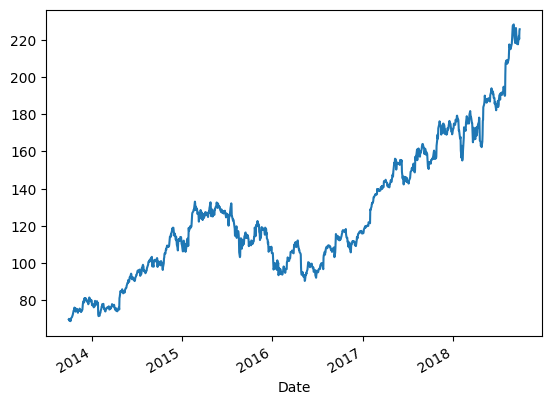

In [29]:
aapl['Close'].plot()

## Visualizations with Pandas

<Axes: >

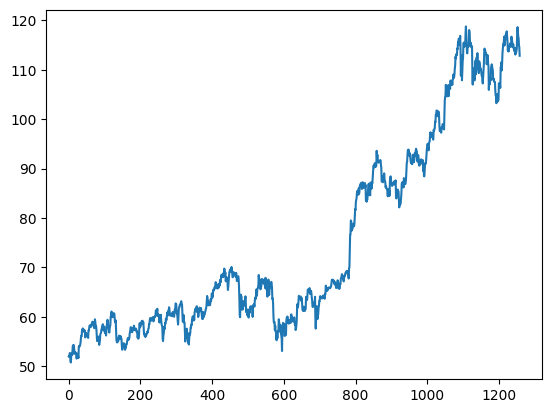

In [33]:
# aapl['Close'].plot() #x-axis by default is the index, Date in this case
jpm = pd.read_csv('StockData/JPM.csv', parse_dates=['Date'])
jpm['Close'].plot() #index is just row numbers

<Axes: xlabel='Date'>

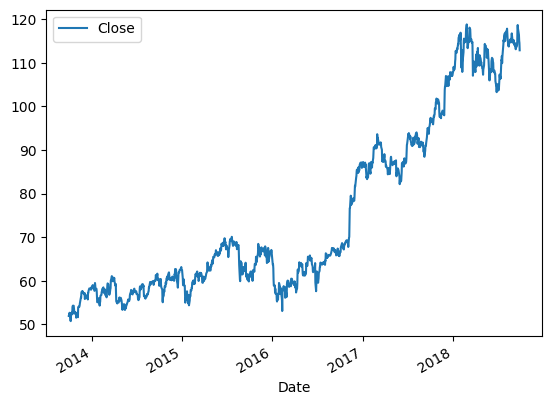

In [34]:
jpm.plot(x='Date', y='Close')

<Axes: xlabel='Date'>

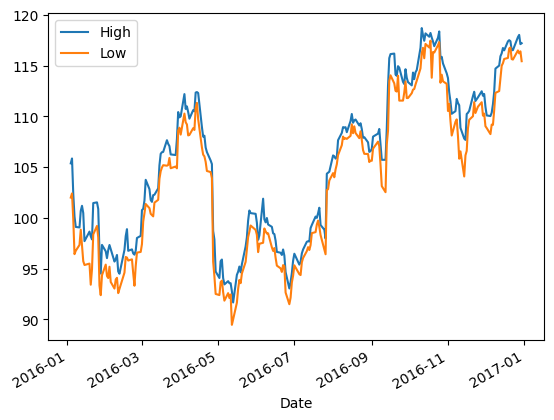

In [36]:
# aapl[['High','Low']].plot()
aapl.loc['2016'][['High','Low']].plot()

<Axes: xlabel='High', ylabel='Low'>

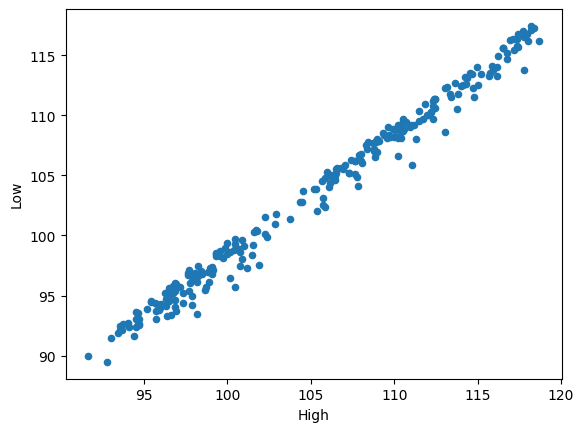

In [38]:
aapl.loc['2016'].plot(x='High', y='Low', kind='scatter')

In [40]:
aapl['Returns'] = aapl['Close'].pct_change()
sp500['Returns'] = sp500['Close'].pct_change()

In [42]:
sp500['Returns'].describe()

count    1259.000000
mean        0.000467
std         0.007758
min        -0.040979
25%        -0.002826
50%         0.000489
75%         0.004560
max         0.039034
Name: Returns, dtype: float64

<Axes: >

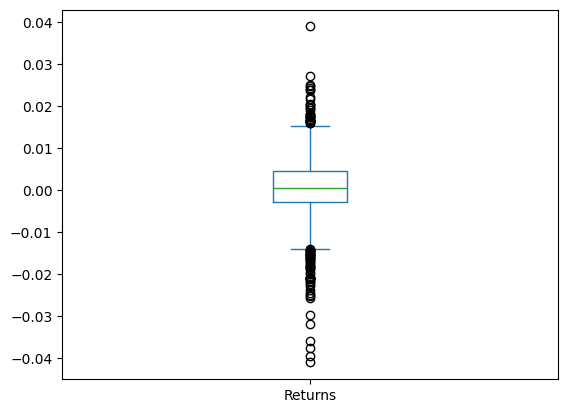

In [41]:
sp500['Returns'].plot(kind='box')
        # outliers --> +/ 1.5 * IQR, where IQR is the range between 25% and 75% percentiles (the box)

<Axes: >

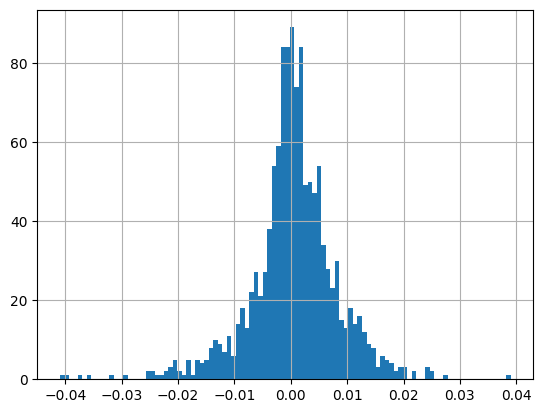

In [44]:
# sp500['Returns'].plot(kind='hist') #10 bins or categories
sp500['Returns'].hist(bins=100)

array([[<Axes: title={'center': 'Returns'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

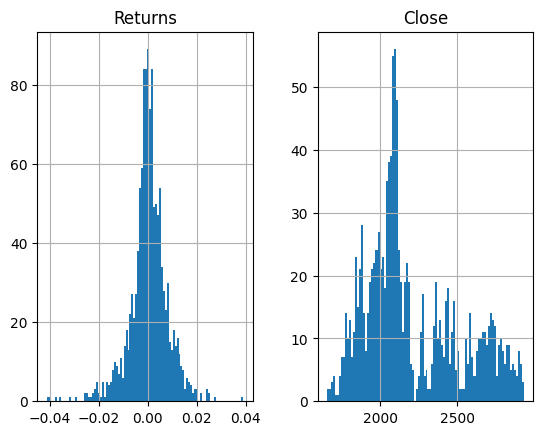

In [45]:
# sp500['Returns'].plot(kind='hist') #10 bins or categories
sp500[['Returns','Close']].hist(bins=100)

## Matplotlib and Seaborn

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

### Simple Graph with Matplotlib
- code for type of graph and series to plot
- settings of the graph (plt.title, plt.legend, etc.)
- plt.show() --> show the graph

In [53]:
#dir(plt) #directory
#plt.

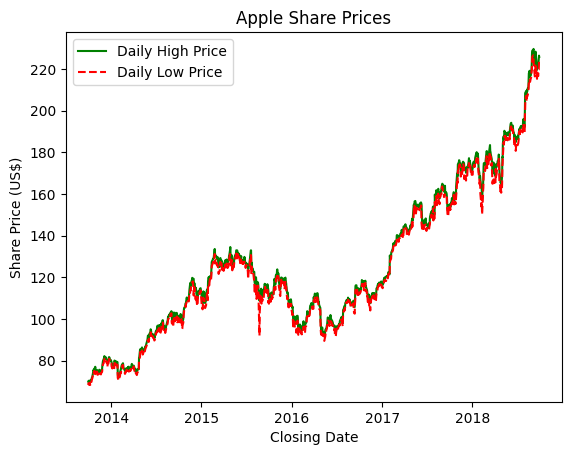

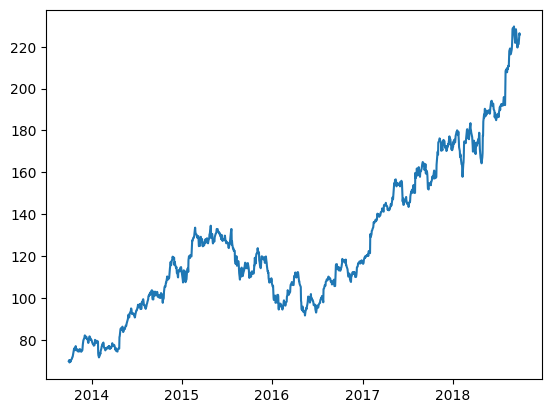

In [78]:
# aapl['Close'].plot() #pandas
plt.plot(aapl.index, aapl['High'], 'green') #matplotlib
plt.plot(aapl.index, aapl['Low'], 'red', linestyle='--')
#settings
plt.title("Apple Share Prices")
plt.xlabel("Closing Date")
plt.ylabel("Share Price (US$)")
plt.legend(['Daily High Price','Daily Low Price'])
# plt.ylim(50,200)
plt.show() # DONE with the first graph

plt.plot(aapl.index, aapl['High']) #NEW graph

### Annotations with Matplotlib

In [79]:
#annotate where the max and min happened for S&P 500

In [87]:
#find the 
maxPrice = sp500['Close'].max()
maxPriceDate = sp500['Close'].idxmax()  #index of the max
#sp500[sp500['Close']==maxPrice].index
maxPrice, maxPriceDate

(2930.75, Timestamp('2018-09-20 00:00:00'))

In [100]:
#Offsetting dates
#maxPriceDate + 10
maxPriceDate - pd.DateOffset(365)

Timestamp('2017-09-20 00:00:00')

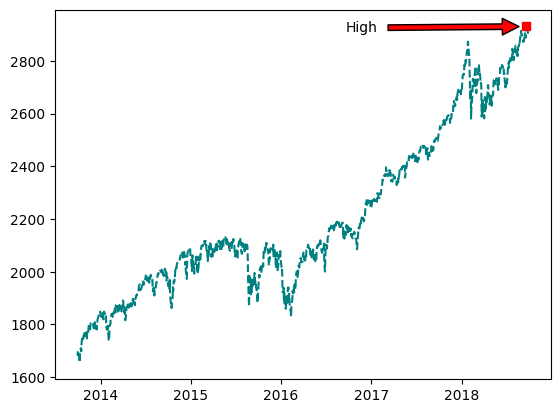

In [126]:
plt.plot(sp500.index, sp500['Close'], 'teal', linestyle='--')
plt.plot(maxPriceDate, maxPrice, 'red', marker='s')
#plt.annotate("High",xy=(maxPriceDate, maxPrice))
#plt.annotate("High",xy=(maxPriceDate - pd.DateOffset(180), maxPrice-20))
plt.annotate("High",xy=(maxPriceDate,maxPrice),
              xytext =(maxPriceDate - pd.DateOffset(365*2), maxPrice-20),
             arrowprops={'facecolor':'red', 'shrink':0.05, 'width':4})
plt.savefig("Output/graph1.jpg") #can also use .png, .jpeg, etc.
plt.show()

### Multiple Charts with Matplotlib
`plt.subplot(x, y, z)`
- x = # of rows
- y = # of cols
- z = graph # to plot

In [127]:
dis = pd.read_csv("StockData/DIS.csv", parse_dates=['Date'], index_col=['Date'])
jpm = pd.read_csv("StockData/JPM.csv", parse_dates=['Date'], index_col=['Date'])

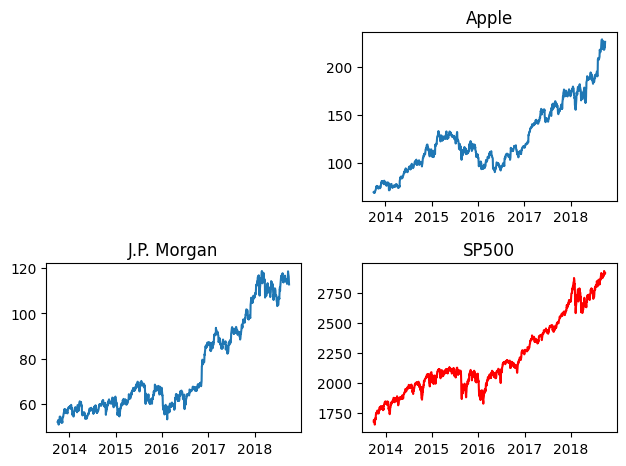

In [141]:
rows = 2
cols = 2

plt.subplot(rows, cols, 4)
plt.plot(sp500.index, sp500['Close'], 'red')
plt.title("SP500")

plt.subplot(rows, cols, 2)
plt.plot(aapl.index, aapl['Close'])
plt.title("Apple")

plt.subplot(rows, cols, 3)
plt.plot(jpm.index, jpm['Close'])
plt.title("J.P. Morgan")

plt.tight_layout(pad=1.20) #adds padding or white space bw the graphs
            #pad = fraction of the font size, e.g. here it is 120%


## Working Session - work until lunch (12pm BST)
- Python 2 Assignment #1 --> try questions 1, 2
- do the "normal" exercises first, and then at the end try the challenge

**Lunch Break from 12 to 1pm BST (7am to 8 am EST)**

## Takeup Assignment 1

### Exercise 1 - Annotations
Challenge: find the max/min price and plot for each year on the graph

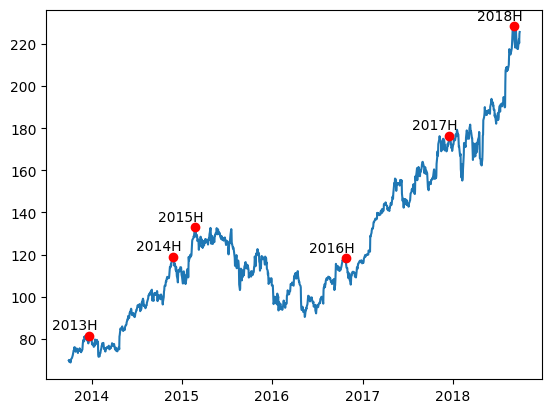

In [150]:
#Max/Min for just 2017
# maxPrice = aapl.loc['2017']['Close'].max()
# maxPriceDate = aapl.loc['2017']['Close'].idxmax() 

# plt.plot(aapl.index, aapl['Close'])
# plt.plot(maxPriceDate, maxPrice, 'red', marker='o')
# plt.annotate("2017 High",xy=(maxPriceDate, maxPrice))

#Challenge make this work for every year
plt.plot(aapl.index, aapl['Close'])

#years = [2013, 2014, 2015, 2016, 2017, 2018]
# years = [x for x in range(2013, 2019)]
# startYear = aapl.index.year.min()
# endYear = aapl.index.year.max()

#for x in years:
for x in aapl.index.year.unique(): #2013, 2014, ... 2018, these are integers
#for x in range(2013,2019):
    maxPrice = aapl.loc[str(x)]['Close'].max() #for the loc you need text, e.g. '2017'
    maxPriceDate = aapl.loc[str(x)]['Close'].idxmax() 
    plt.plot(maxPriceDate, maxPrice, 'red', marker='o')
    plt.annotate(str(x) + "H",xy=(maxPriceDate-pd.DateOffset(150), maxPrice+3))

plt.show()


### Exercise 2 - Subplots

In [ ]:
# aapl = pd.read_csv("StockData/AAPL.csv", parse_dates=['Date'], index_col=['Date'])
# sp500 = pd.read_csv("StockData/sp500.csv", parse_dates=['Date'], index_col=['Date'])
# axp = pd.read_csv("StockData/AXP.csv", parse_dates=['Date'], index_col=['Date'])
# ba = pd.read_csv("StockData/BA.csv", parse_dates=['Date'], index_col=['Date'])
# cat = pd.read_csv("StockData/CAT.csv", parse_dates=['Date'], index_col=['Date'])
# csco = pd.read_csv("StockData/CSCO.csv", parse_dates=['Date'], index_col=['Date'])

In [165]:
tickers = ['AAPL','WMT','NKE','DIS','JPM','SP500']
titles = ['Apple', 'Walmart', 'Nike', 'Disney','JP Morgan', 'S&P 500']
files = []
for ticker in tickers:
    df = pd.read_csv('StockData/'+ ticker + '.csv', parse_dates=['Date'], index_col=['Date'])
    files.append(df)

0 AAPL
1 WMT
2 NKE
3 DIS
4 JPM
5 SP500


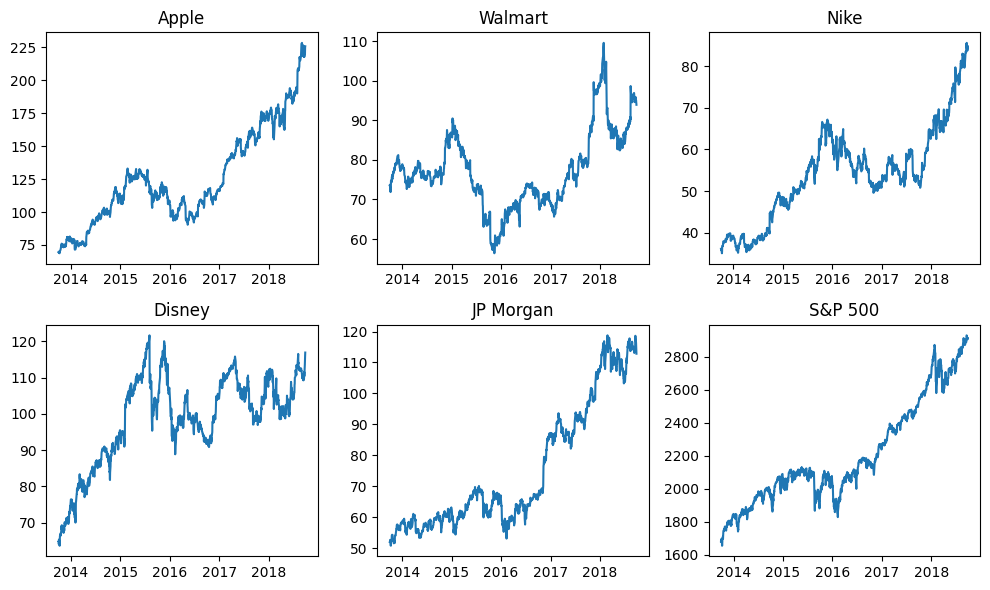

In [166]:
rows = 2
cols = 3
plt.figure(figsize=(10, 6)) #size of graph in inches, 10in wide, 6in height
for idx, ticker in enumerate(tickers):
    print(idx, ticker) 
    df = files[idx] #table, the data set of each co

    plt.subplot(rows, cols, idx+1)
    plt.plot(df.index, df['Close'])
    plt.title(titles[idx])
plt.tight_layout()

## Seaborn Graphs

<Axes: xlabel='Date', ylabel='Close'>

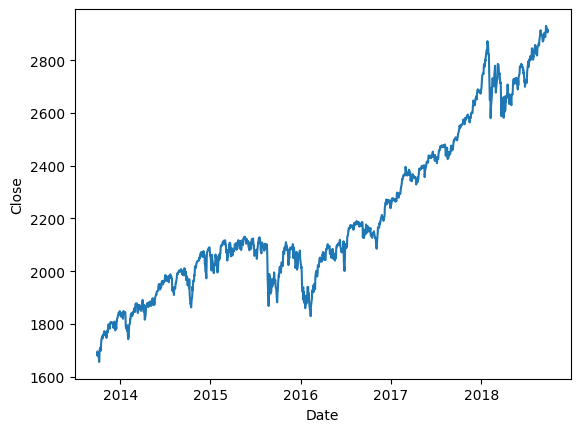

In [168]:
sns.lineplot(sp500, x=sp500.index, y=sp500['Close'])

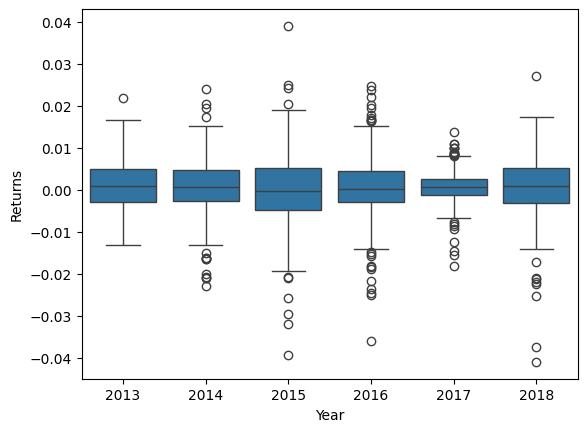

In [175]:
sp500['Returns'] = sp500['Close'].pct_change()
sp500['Year'] = sp500.index.year
sns.boxplot(sp500, y='Returns', x='Year')
plt.show()

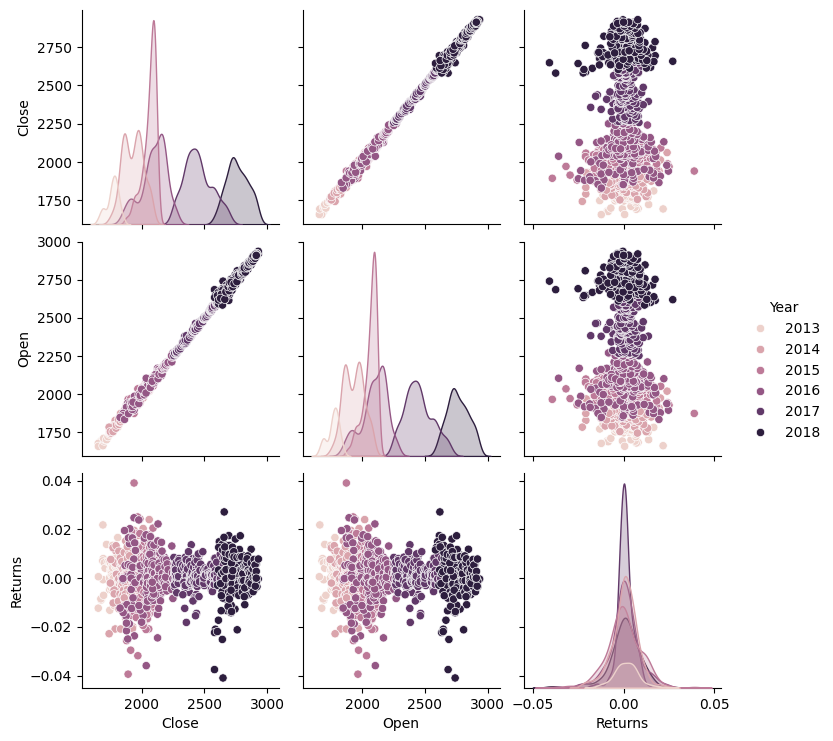

In [178]:
# sns.pairplot(sp500)
# sns.pairplot(sp500[['Close','Open','Returns','Year']])
sns.pairplot(sp500[['Close','Open','Returns','Year']], hue='Year')

## Plotly Graphs
https://plotly.com/python/plotly-express/

In [180]:
import plotly.express as px

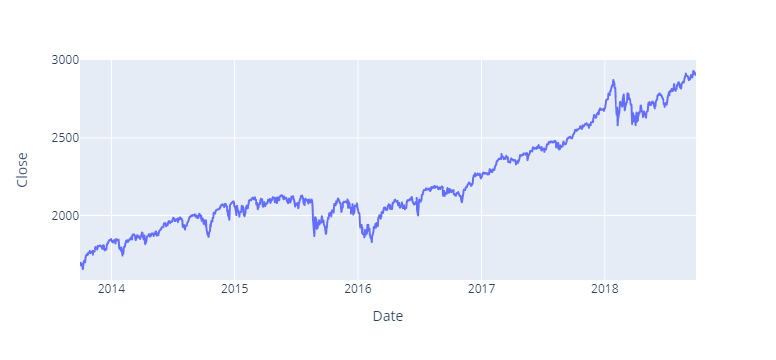

In [181]:
px.line(sp500, x=sp500.index, y='Close')

In [183]:
sp500['Ticker'] = 'SP500'
aapl['Ticker'] = 'AAPL'

intc = pd.read_csv("StockData/INTC.csv", parse_dates=['Date'], index_col=['Date'])
intc['Returns'] = intc['Close'].pct_change()
intc['Ticker'] = 'INTC'

ibm = pd.read_csv("StockData/IBM.csv", parse_dates=['Date'], index_col=['Date'])
ibm['Returns'] = ibm['Close'].pct_change()
ibm['Ticker'] = 'IBM'

stockData = pd.concat([intc,aapl,ibm])
# stockData

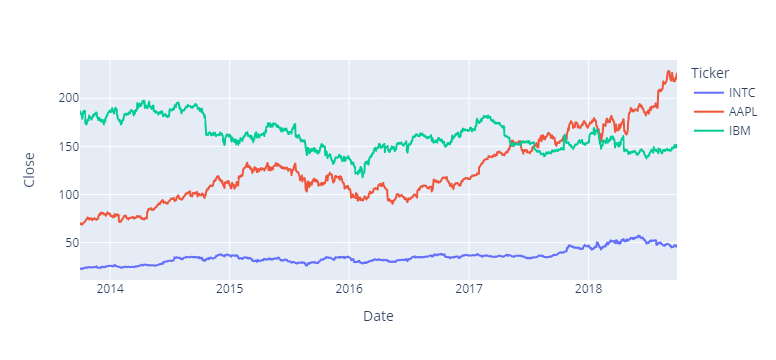

In [185]:
#px.line(stockData, x=stockData.index, y='Close') #treating entire data set as one company
px.line(stockData, x=stockData.index, y='Close', color='Ticker')
                        #color= in plotly is the same as hue= in seaborn

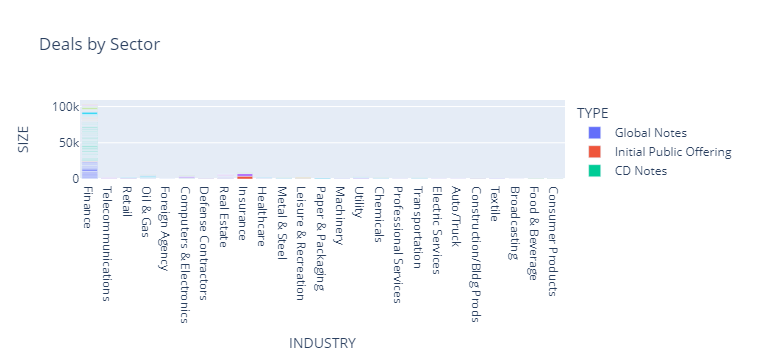

In [193]:
# figBar = px.bar(finData, x='INDUSTRY', y='SIZE')
figBar = px.bar(finData, x='INDUSTRY', y='SIZE', color='TYPE',hover_name='ISSUER', title='Deals by Sector')
figBar.show()

In [195]:
figBar.write_html(file="Output/plotly demo EMEA.html")

## Coffee Break until 2:25pm BST / 9:25am EST

## Linear Regressions
`Financial Analysis Examples.ipynb`

### Simple Example - Exam Scores

In [196]:
import statsmodels.api as sm #OLS model for linear regressions

In [199]:
df = pd.read_csv('ExData/score.csv')
#df #hours studied for an exam, the final score on that exam
    # x = hours
    # y = scores

In [212]:
df_clean = df[~((df['Hours']<3) & (df['Scores']>50))] #~ means "not"
# df_clean = pd.concat([df.iloc[0:25], df.iloc[26:]])
# df_clean

<Axes: xlabel='Hours', ylabel='Scores'>

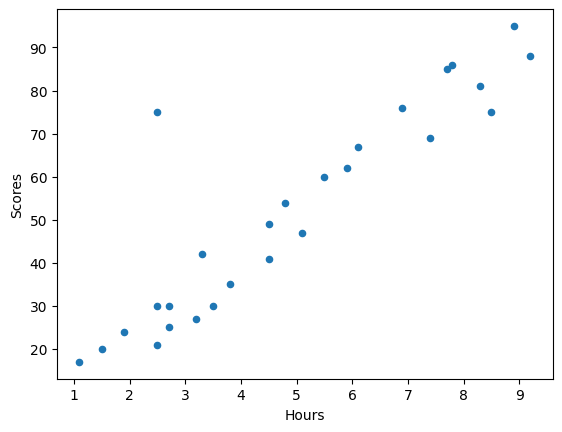

In [206]:
df.plot(x='Hours',y='Scores', kind='scatter')

<Axes: >

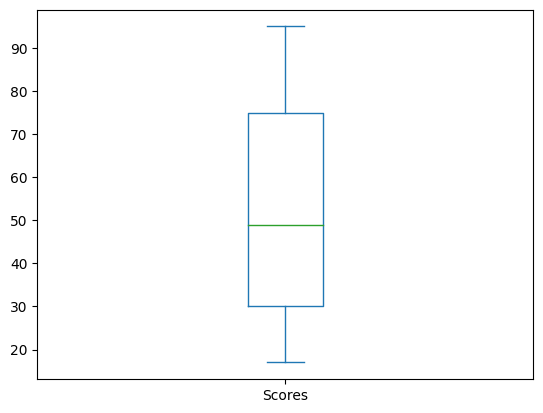

In [205]:
#df.info()
# df.describe()
df['Scores'].plot(kind='box')

### Running the Linear Regression
- model = sm.OLS(y, x's)
- results = model.fit()
- output some of the results, look at metrics (e.g. r^2, p-vals, conf interval, etc.)
- predict new results
- (visualize)

OLS = Ordinary Least Squares
- minimizing for the sum of the squared error terms, error term = diff bw predicted y vs actual y

In [214]:
model = sm.OLS(df['Scores'], df['Hours']) # y, x
                    #multiple x's  df[[col1, col2, col3]]
results = model.fit() #find the line of best fit

In [219]:
results.rsquared

0.9643462690261214

In [220]:
results.params #coefficients

Hours    10.345622
dtype: float64

In [221]:
results.pvalues

Hours    2.371128e-20
dtype: float64

In [216]:
# dir(results)
results.summary()
        #r2 = 0.964
    #check the p-values of your x's, make sure they are as close to 0 as possible
            #cutoff is usually around 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              703.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):                    2.37e-20
Time:                        09:59:39   Log-Likelihood:                         -102.76
No. Observations:                  27   AIC:                                      207.5
Df Residuals:                      26   BIC:                                      208.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.3456      0.390     26.519      0.000       9.544      11.148
==============================================================================
Omnibus:                       43.258   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.079
Skew:                           3.004   Prob(JB):                     6.46e-41
Kurtosis:                      14.332   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
newStudentHours = 4
newStudnetScore = results.predict(newStudentHours)
newStudnetScore

array([41.38248734])

In [225]:
newHours = [4, 2, 6, 5.5]
results.predict(newHours)

array([41.38248734, 20.69124367, 62.07373101, 56.90092009])

In [226]:
df['Predictions'] = 10.3456 * df['Hours']
df['Predict'] = results.predict(df['Hours']) #same as above
df.head(3)

Hours  Scores  Predictions    Predict
0    2.5      21     25.86400  25.864055
1    5.1      47     52.76256  52.762671
2    3.2      27     33.10592  33.105990

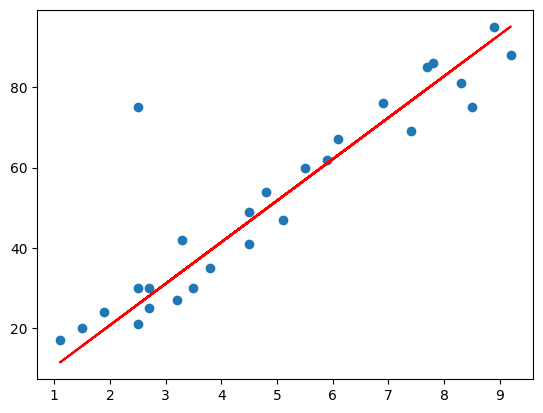

In [228]:
plt.plot(df['Hours'], df['Predict'],'red') #line of best fit
plt.scatter(df['Hours'], df['Scores'])
plt.show()

In [218]:
model2 = sm.OLS(df_clean['Scores'], df_clean['Hours'])
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2730.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):                    4.72e-27
Time:                        10:03:22   Log-Likelihood:                         -80.811
No. Observations:                  26   AIC:                                      163.6
Df Residuals:                      25   BIC:                                      164.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1923      0.195     52.246      0.000       9.791      10.594
==============================================================================
Omnibus:                        4.170   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.126
Skew:                          -0.424   Prob(JB):                        0.345
Kurtosis:                       1.885   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding a y-intercept
- slope of the line: y = mx + b, m = slope, b = y-intercept
- OLS model doesn't include a y-intercept by default, but you can force it with dummy 1's as X's
    -   y = coef0 * x0 + coef1 * x1
-   x0 = a column of dummy 1's
    -   y = coef0 * 1 + coef1 * x1

- statsmodels has sm.add_constant(X) or you can df['Const'] = 1

In [238]:
df['Const'] = 1
model_const = sm.OLS(df['Scores'], df[['Const','Hours']])
results_const = model_const.fit()
df['Predict with intercept'] = results_const.predict(df[['Const','Hours']])
results_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           8.49e-11
Time:                        10:29:44   Log-Likelihood:                -101.26
No. Observations:                  27   AIC:                             206.5
Df Residuals:                      25   BIC:                             209.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const          7.9390      4.635      1.713      0.099      -1.607      17.485
Hours          9.0450      0.848     10.672      0.000       7.299      10.790
==============================================================================
Omnibus:                       40.541   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.698
Skew:                           2.846   Prob(JB):                     1.89e-33
Kurtosis:                      13.078   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

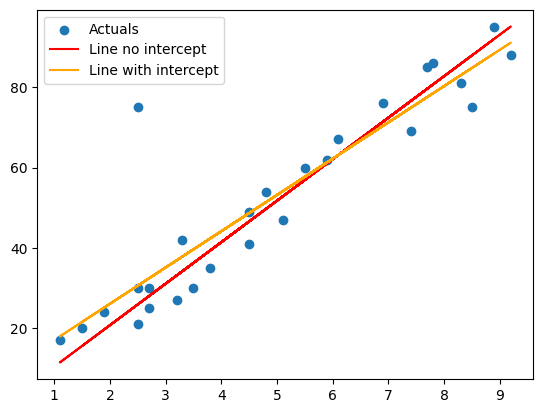

In [242]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'], df['Predict'], 'red')
plt.plot(df['Hours'], df['Predict with intercept'], 'orange')
plt.legend(['Actuals', 'Line no intercept', 'Line with intercept'])
plt.show()

In [235]:
X = sm.add_constant(df_clean['Hours'])

model_const = sm.OLS(df_clean['Scores'], X)
results_const = model_const.fit()
results_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     482.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.14e-17
Time:                        10:28:09   Log-Likelihood:                -80.214
No. Observations:                  26   AIC:                             164.4
Df Residuals:                      24   BIC:                             166.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6213      2.470      1.061      0.299      -2.476       7.719
Hours          9.7677      0.445     21.954      0.000       8.849      10.686
==============================================================================
Omnibus:                        6.855   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.166
Skew:                          -0.265   Prob(JB):                        0.339
Kurtosis:                       1.689   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Break until 10:45 am EST / 3:45 pm BST

## S&P 500 vs AAPL Example
CAPM = capital asset pricing model
- it's used to find the discount rate for stocks/investments/portfolios
- required return on equity of the stock/portfolio
- return stock = rf + beta * MRP
    - rf = risk free rate --> interest rate of "riskless asset", 10-year or 5-year gov't bond
    - MRP = market risk premium = "excess returns" of the stock market OVER the risk free asset
        - e.g. return of S&P vs. return of the US Bonds
        - MRP = rSP - rf
     
- Assume: rf = 0%
    - rStock = 0% + beta * (rMarket - 0%)
    - rApple = beta * rSP500
 
    - excess returns of Apple = beta * MRP
    - rAPPL- rf = beta * (rSP - rf)

In [248]:
sp500['Returns'] = sp500['Close'].pct_change()
aapl['Returns'] = aapl['Close'].pct_change()

### Merging and Cleaning up the Data

In [256]:
# mergedData = sp500.merge(aapl, left_index=True, right_index=True )
#mergedData = sp500.merge(aapl, on=['Date'], how='inner', suffixes=('_market', '_stock'))
mergedData = sp500.merge(aapl, on=['Date'], how='inner')
            #only want to keep rows where there is both an x and a y to use for the OLS model
            #---> use how='inner'

#there is still one NA left in there, because AAPL doesn't have info for previous day on first row
mergedData.dropna(inplace=True)
mergedData.dropna(subset=['Returns_y','Returns_x'], inplace=True)
# mergedData

### Running the OLS Model

In [258]:
#sm.add_constant(mergedData['Returns_x'])

In [259]:
model = sm.OLS(mergedData['Returns_y'], mergedData['Returns_x'])  #y, x's
model_yint = sm.OLS(mergedData['Returns_y'], sm.add_constant(mergedData['Returns_x']))  #y, x's

results = model.fit()
results_yint = model_yint.fit()

In [262]:
results.summary()
#results_yint.summary()
mergedData['Apple Predict'] = results.predict(mergedData['Returns_x'])
mergedData['Apple Predict yint'] = results_yint.predict(sm.add_constant(mergedData['Returns_x']))

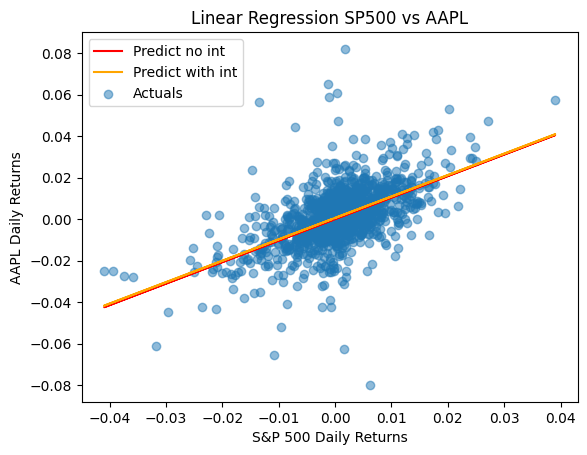

In [263]:
plt.plot(mergedData['Returns_x'],mergedData['Apple Predict'],'red')
plt.plot(mergedData['Returns_x'],mergedData['Apple Predict yint'],'orange')
plt.scatter(mergedData['Returns_x'],mergedData['Returns_y'],alpha=0.5)
                #alpha = transparency of 50%
plt.title("Linear Regression SP500 vs AAPL")
plt.xlabel("S&P 500 Daily Returns")
plt.ylabel("AAPL Daily Returns")
plt.legend(['Predict no int', 'Predict with int','Actuals']) 
plt.show()

## Working Session Python 2 - Assignment #2
- Exercise 1 - Fama French 3 Factor Model
- can skip part 3 where you are changing the dates, as long as you use parse_dates in the read_csv formula
- take-up tomorrow morning 

## Takeup Assignment #2 - Fama French

In [265]:
import pandas as pd
import statsmodels.api as sm

In [286]:
aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'], index_col=['Date'])
ff3 = pd.read_csv('ExData/ff3_daily.csv', parse_dates=['date'])

In [287]:
aapl['Returns'] = aapl['Adj Close'].pct_change()
aapl['Returns'] *= 100  # returns * 100; x*=5 --> x = x * 5

In [288]:
#data = ff3.merge(aapl, left_on=['date'], right_index=True, how='inner')
data = ff3.merge(aapl, left_on=['date'], right_on=['Date'], how='inner')
# data.info()

In [289]:
data.columns

Index(['date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Returns'],
      dtype='object')

In [290]:
data['AAPL - rf'] = data['Returns'] - data['RF'] #excess returns of Apple over the risk-free rate

In [291]:
data = data.dropna()
#data.dropna(inplace=True)

In [285]:
# data.info()

### OLS Model - Without Constant
r2 - 35%
betas - 1.0133, -0.25, -.55

In [293]:
model = sm.OLS(data['AAPL - rf'], data[['Mkt-RF', 'SMB', 'HML']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              AAPL - rf   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              227.6
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                   6.91e-118
Time:                        04:23:22   Log-Likelihood:                         -1952.5
No. Observations:                1258   AIC:                                      3911.
Df Residuals:                    1255   BIC:                                      3926.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0133      0.041     24.647      0.000       0.933       1.094
SMB           -0.2589      0.065     -3.954      0.000      -0.387      -0.130
HML           -0.5551      0.067     -8.237      0.000      -0.687      -0.423
==============================================================================
Omnibus:                      227.246   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3620.127
Skew:                           0.319   Prob(JB):                         0.00
Kurtosis:                      11.286   Cond. No.                         1.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
data['Predict'] = results.predict(data[['Mkt-RF', 'SMB', 'HML']])

data['Apple Predict'] = data['Predict'] + data['RF']
data[['RF','AAPL - rf','Predict','Returns', 'Apple Predict']]

RF  AAPL - rf   Predict   Returns  Apple Predict
1     0.000   0.327914  0.038855  0.327914       0.038855
2     0.000  -1.256248 -0.953565 -1.256248      -0.953565
3     0.000  -0.078596  0.696928 -0.078596       0.696928
4     0.000   0.977174 -0.892761  0.977174      -0.892761
5     0.000  -1.396236 -1.668225 -1.396236      -1.668225
...     ...        ...       ...       ...            ...
1254  0.008   1.430018  0.161080  1.438018       0.169080
1255  0.008   0.626091  0.115941  0.634091       0.123941
1256  0.008  -0.804617  0.020197 -0.796617       0.028197
1257  0.008   2.047167  0.657328  2.055167       0.665328
1258  0.008   0.343193 -0.028463  0.351193      -0.020463

[1258 rows x 5 columns]

### OLS Model - With Constant

In [303]:
X = data[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
model_const = sm.OLS(data['AAPL - rf'], X)
results_const = model_const.fit()
results_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AAPL - rf   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     224.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.11e-116
Time:                        04:39:26   Log-Likelihood:                -1951.3
No. Observations:                1258   AIC:                             3911.
Df Residuals:                    1254   BIC:                             3931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.032      1.519      0.129      -0.014       0.112
Mkt-RF         1.0091      0.041     24.502      0.000       0.928       1.090
SMB           -0.2567      0.065     -3.923      0.000      -0.385      -0.128
HML           -0.5526      0.067     -8.201      0.000      -0.685      -0.420
==============================================================================
Omnibus:                      227.104   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3618.842
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                      11.285   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
import seaborn as sns

In [305]:
data.columns

Index(['date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Returns', 'AAPL - rf', 'Predict',
       'Apple Predict'],
      dtype='object')

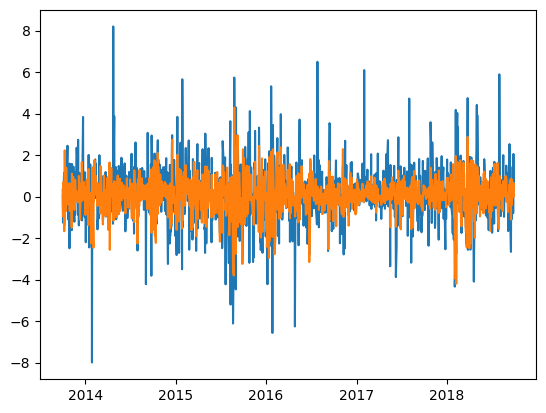

In [307]:
plt.plot(data['date'], data['Returns'])
plt.plot(data['date'], data['Apple Predict'])
plt.show()

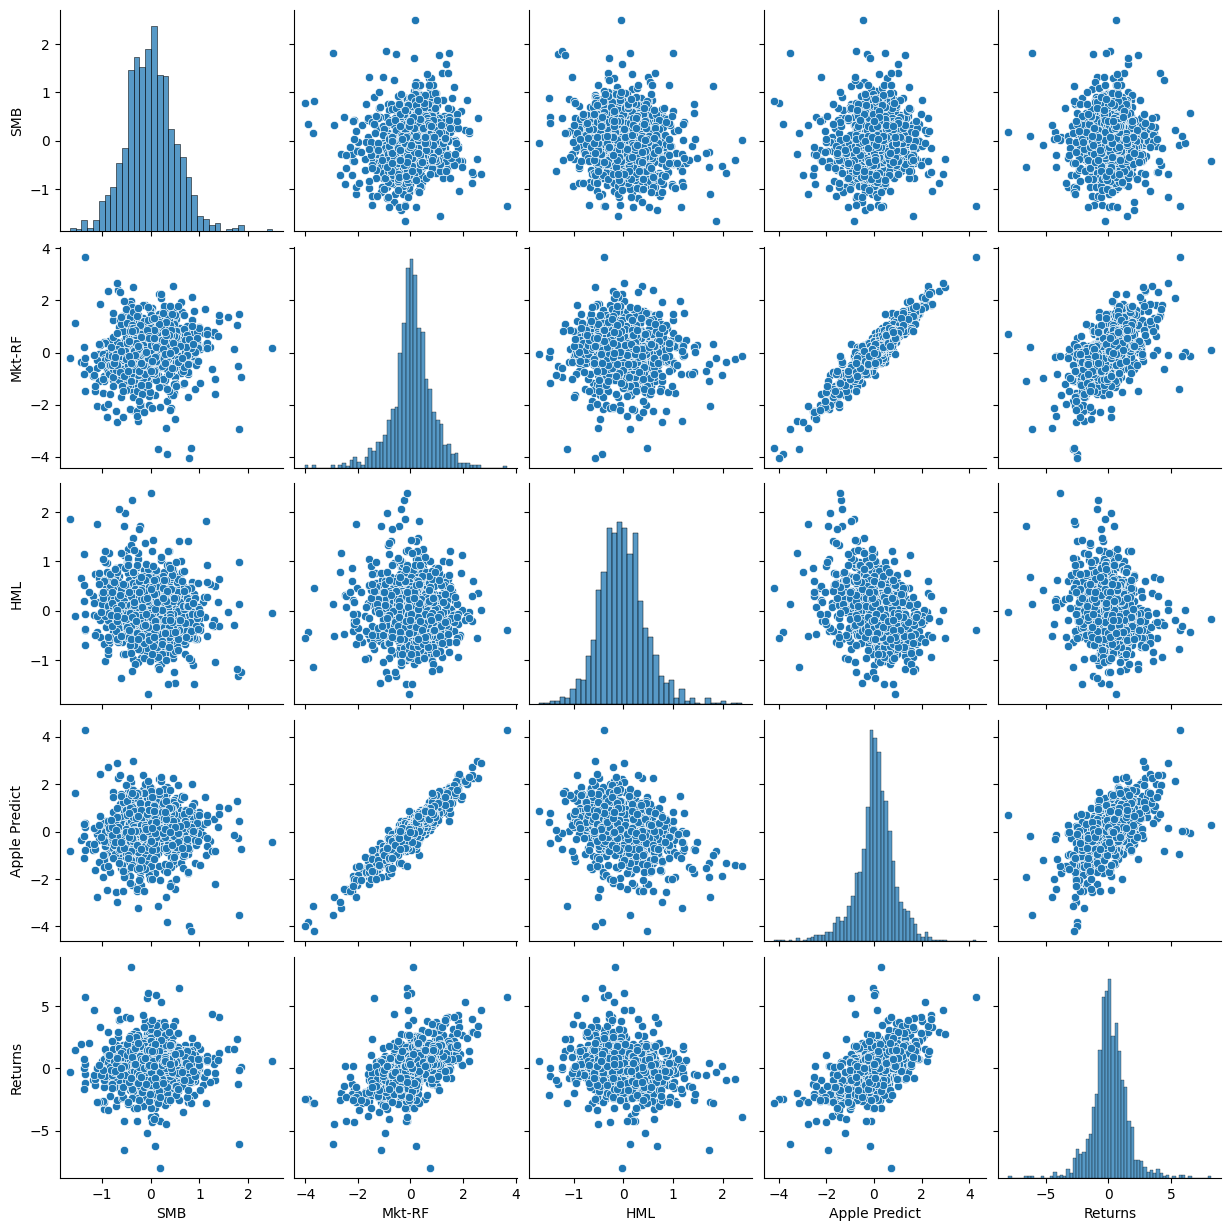

In [308]:
sns.pairplot(data[['SMB','Mkt-RF', 'HML','Apple Predict','Returns']])